### Import packages

In [1]:
import sys
sys.path.append('../')
import numpy as np
from gmm_mi import GMM, GMM_MI
from utils.synthetic_data import D3p as dataset
from utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves

### Calculate the true MI of the synthetic model, and plot contours

0.38892998866932643


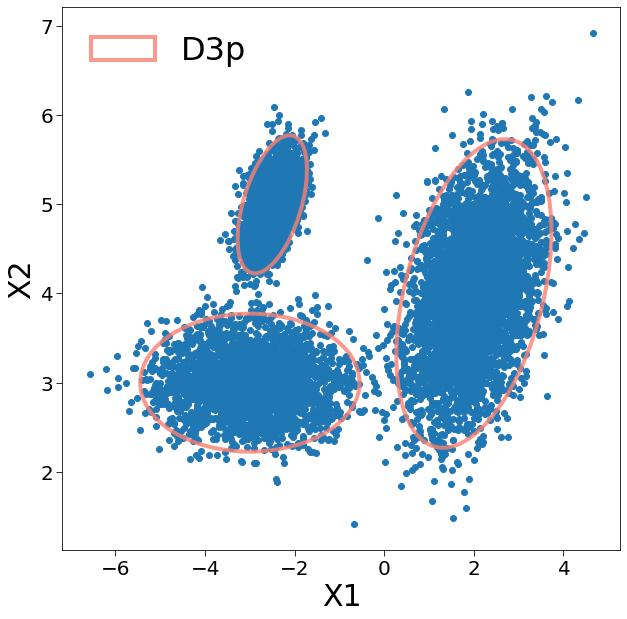

In [2]:
label = 'D3p'
analytic = 0.38892998866932643#dataset.estimate_MI_MC(MC_samples=1e8)
print(analytic)
plot_gmm_contours(dataset, ls='-', label=label)

### Test on 500 trials

In [ ]:
N = 10000
random_states = 1

# probably make a yaml file for these parameters
# parameters to play with
n_inits = 10
n_folds = 5
init_type = 'random_sklearn'
MC_samples = 1e5
tol = 1e-6
reg_covar = 1e-15
max_iter = 10000
MC_samples = 1e5
bootstrap = False
fixed_components = True
n_bootstrap = 100
select_c = 'valid'
patience = 1
all_MI_estimates = np.zeros((random_states))

n_components = dataset.n_components 
true_weights = dataset.weights_
true_means = dataset.means_
true_covariances = dataset.covariances_

for r in range(random_states):
    
    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]

    MI_mean, _, lc = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, 
                            init_type=init_type, reg_covar=reg_covar, tol=tol, max_iter=max_iter,
                            bootstrap=bootstrap, n_bootstrap=n_bootstrap, MC_samples=MC_samples, 
                            fixed_components=fixed_components, fixed_components_number=n_components, 
                            select_c=select_c, patience=patience)
    

    # print for debugging purposes
    print(r, MI_mean) 

    all_MI_estimates[r] = MI_mean

    # save, if needed
    #np.save('./D3p_bias_MI_test.npy', all_MI_estimates)

### Evaluate MI bias

In [ ]:
# load in case you saved it
#all_MI_estimates = np.load('./D3p_bias_MI_test.npy')

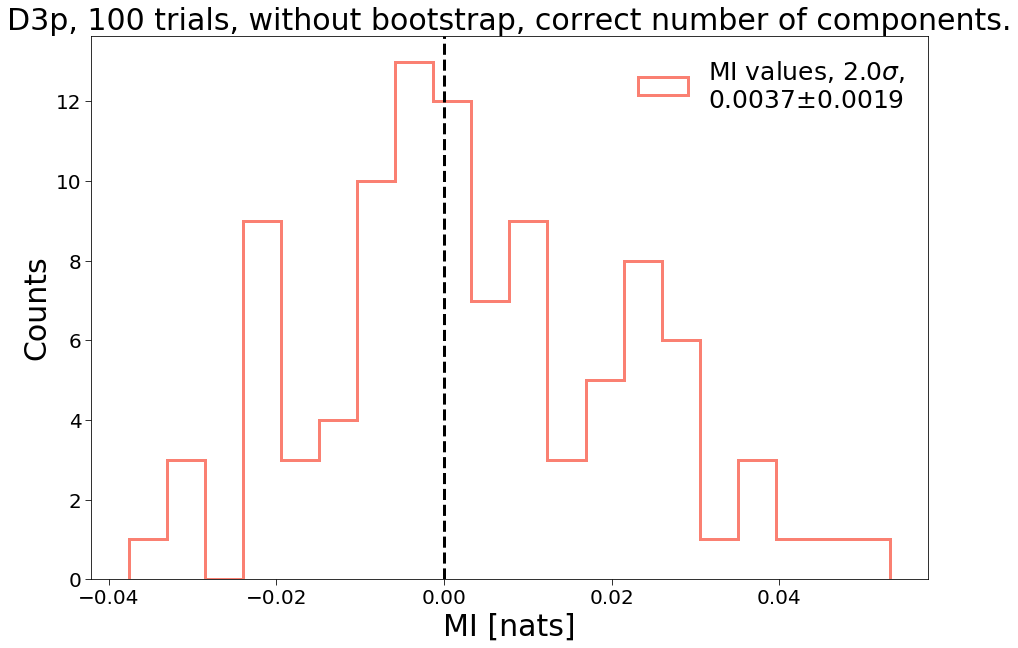

In [14]:
histogram_estimates(all_MI_estimates - analytic, title=f'{label}, {random_states} trials, without bootstrap, correct number of components.')

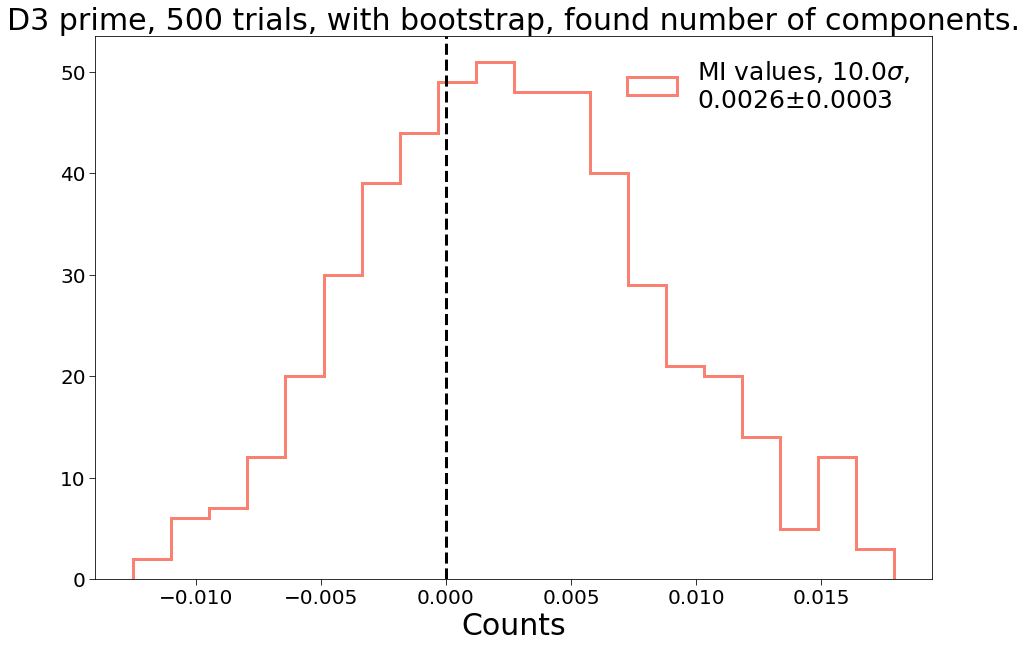

In [5]:
plot_MI_values(all_MI_estimates - analytic, title=f'D3 prime, {random_states} trials, with bootstrap, found number of components.')